# Import dependencies

In [ ]:
import torch
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
import utils
from datetime import datetime
from dataset.FashionMNISTDataset import FashionMNISTDataset


# Device configuration

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# Hyperparameters and constants

In [3]:
num_epochs = 5
batch_size = 64
num_classes = 10
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
save_dir = "data/"

# Dataset

In [ ]:
utils.download_fmnist_img_data(is_training=True, save_dir=save_dir)
utils.download_fmnist_img_data(is_training=False, save_dir=save_dir)

In [8]:
train_dataset = FashionMNISTDataset(img_dir=save_dir+"train/", annotation_file=save_dir+"train_annotation.csv")
test_dataset = FashionMNISTDataset(img_dir=save_dir+"test/", annotation_file=save_dir+"test_annotation.csv")

# Data loader

In [9]:
train_dataloader = DataLoader(train_dataset,
                              batch_size=batch_size,
                              shuffle=True)
test_dataloader = DataLoader(test_dataset,
                             batch_size=batch_size,
                             shuffle=False)

In [14]:
images, labels = next(iter(train_dataloader))
print(f"Batch data shape: {images.shape}")
print(f"Batch label shape: {labels.shape}")

Batch data shape: torch.Size([64, 1, 28, 28])
Batch label shape: torch.Size([64])


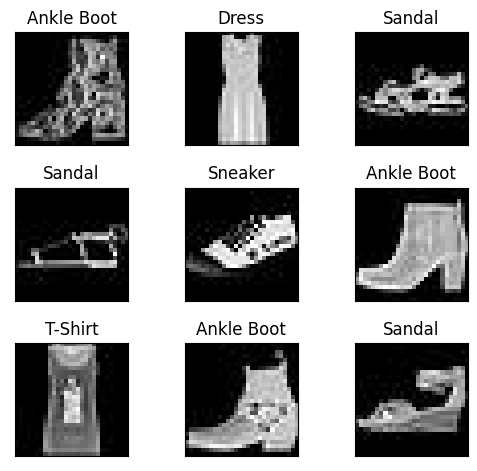

In [12]:
plt.figure(figsize=[5, 5])
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(labels_map[labels[i].item()])
    plt.xticks([])
    plt.yticks([])